In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('salary.csv')
df.head()

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  30 non-null     float64
 1   Salary      30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.isnull().sum()

Experience    0
Salary        0
dtype: int64

In [6]:
df.describe()

,Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

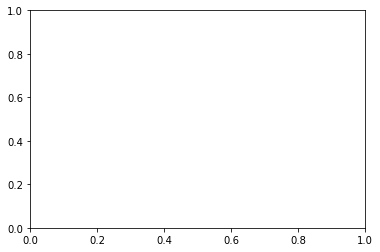

In [9]:
sns.histplot(bins=30,figure=(20,10),color='blue')

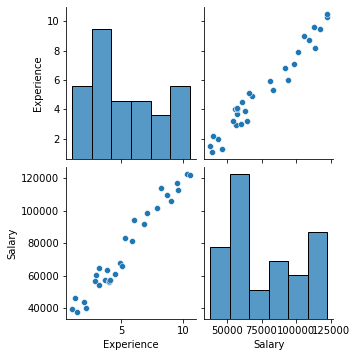

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='Salary', ylabel='Experience'>

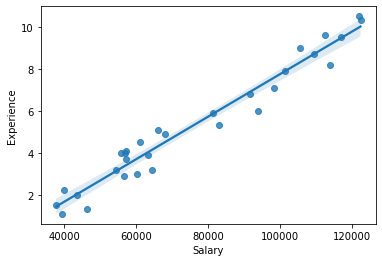

In [11]:
sns.regplot(x='Salary',y='Experience',data=df)

In [12]:
df.head(1)

,Experience,Salary
0,1.1,39343.0


In [25]:
x=df[['Experience']]
y=df[['Salary']]

In [26]:
x.shape

(30, 1)

In [27]:
y.shape

(30, 1)

In [28]:
x=np.array(x).astype('float32')
y=np.array(y).astype('float32')

In [29]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]], dtype=float32)

In [30]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]], dtype=float32)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
x_train.shape

(24, 1)

In [33]:
x_test.shape

(6, 1)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
lr_accuracy=lr.score(x_test,y_test)
lr_accuracy

0.9824585956559307

In [45]:
print('model intercept',lr.intercept_)
print('model coff',lr.coef_)

model intercept [24612.016]
model coff [[9641.606]]


In [48]:
y_predict=lr.predict(x_test)
y_predict

array([[ 90174.94 ],
       [ 43895.227],
       [125848.88 ],
       [ 35217.78 ],
       [ 53536.836],
       [ 60285.96 ]], dtype=float32)

Text(0.5, 1.0, 'number of salary')

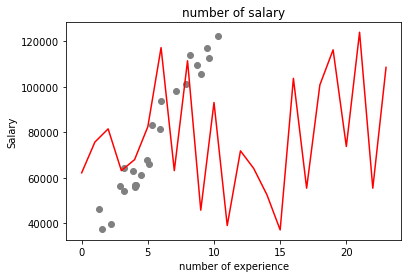

In [50]:
plt.scatter(x_train,y_train,color='gray')
plt.plot(lr.predict(x_train),color='red')
plt.ylabel('Salary')
plt.xlabel('number of experience')
plt.title('number of salary')

In [56]:
number_exp=[[5]]
number_exp

[[5]]

In [64]:
salary=lr.predict(number_exp)
salary

array([[72820.04785156]])

In [65]:
import pickle

In [66]:
pickle.dump(lr,open('regmodel.pkl','wb'))

In [67]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [68]:
pickled_model.predict(number_exp)

array([[72820.04785156]])